In [ ]:
                     """  https://github.com/Shivam1795  """

In [1]:
## Import all the required libraries !!
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

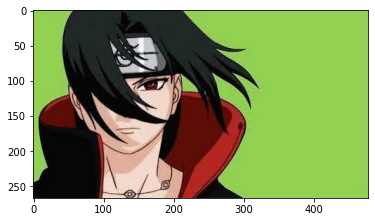

In [2]:
## Read RGB image !!
image = mpimg.imread('images/itachi_greenScreen.jpg')

## Display RGB image !!
plt.imshow(image);

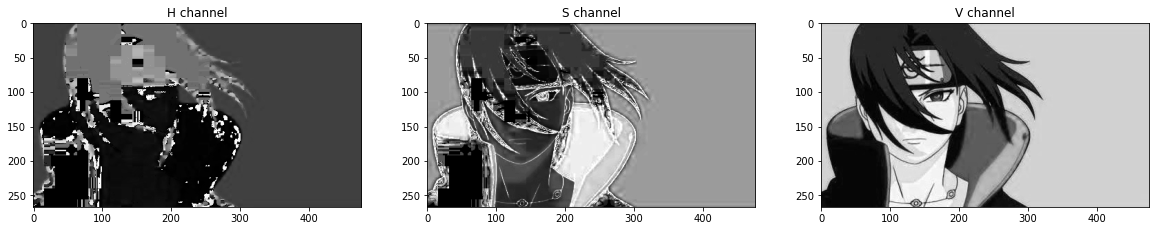

In [3]:
## Convert to HSV colorspace and Display each channel##

## Convert image to HSV from RGB !!
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

## HSV Channels !!
(h, s, v) = (hsv[:,:,0], hsv[:,:,1], hsv[:,:,2])

## Display each channel ##

## Define three subplots in a single row with figure size 20x10 !!
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

## Set titles for each image !!
ax1.set_title('H channel'); ax2.set_title('S channel'); ax3.set_title('V channel')

## Display three images !!
ax1.imshow(h, cmap='gray'); ax2.imshow(s, cmap='gray'); ax3.imshow(v, cmap='gray');

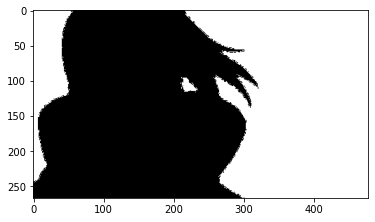

In [4]:
## Generate mask using HSV Colorspace ##

## Define boundaries in HSV colorspace for color selection  !!
## Just play around with these values to find correct upper and lower threshold values !!

lower_bound = np.array([20, 90, 80])
upper_bound = np.array([70, 255, 255])

## Uncomment these lines for cat image !!
#lower_bound = np.array([40, 90, 150])
#upper_bound = np.array([50, 200, 255])

## Generate a mask !!
mask = cv2.inRange(hsv, lower_bound, upper_bound)

## Display mask !!
plt.imshow(mask, cmap='gray');

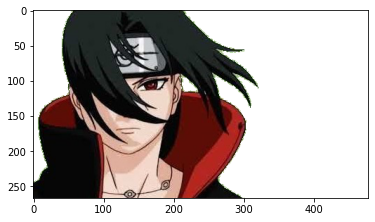

In [5]:
## Create a copy of the original image !!
masked_img = image.copy()

## Generate masked image with white background !!
masked_img[mask != 0] = [255, 255, 255]

## Display masked image !!
plt.imshow(masked_img);

In [6]:
## To generate a transparent background, we will use PILLOW library ##

## OpenCV and matplotlib read images as numpy array, So first convert our image to PILLOW image format from a numpy array !!
img = Image.fromarray(masked_img)

## Now convert this image to RGBA colorspace (RED-GREEN-BLUE-ALPHA{Responsible for transparency}) from RGB !!
img = img.convert("RGBA")

## Generate a list of tuples serially, grouping the pixel intensity values from all 4-channels (i.e. RGBA) !!
RGBA_tuples = list(img.getdata())

## Initialize an empty list to store modified RGBA_tuples !!
new_RGBA_tuples = []

## Check each RGBA_tuple one-by-one if the pixel is pure white replace it with the transparent pixel else keep it as it is !!
for item in RGBA_tuples:
    if item[0] == 255 and item[1] == 255 and item[2] == 255:
        new_RGBA_tuples.append((255, 255, 255, 0))
    else:
        new_RGBA_tuples.append(item)

## From new list of RGBA_tuples create an image (img) !!
img.putdata(new_RGBA_tuples)

## To save this new transparent image in PNG format uncomment this line !!
#img.save("./transparent.png", "PNG")

## Display new transparent image !!
img.show()

In [7]:
##Thanks !!